In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [3]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df =df.fillna(df['Age'].mean())

In [10]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Survived','Pclass','Fare']] = sc.fit_transform(df[['Survived','Pclass','Fare']])

# Task
Visualize outliers using boxplots and remove them from the numerical features of the dataframe.

In [16]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


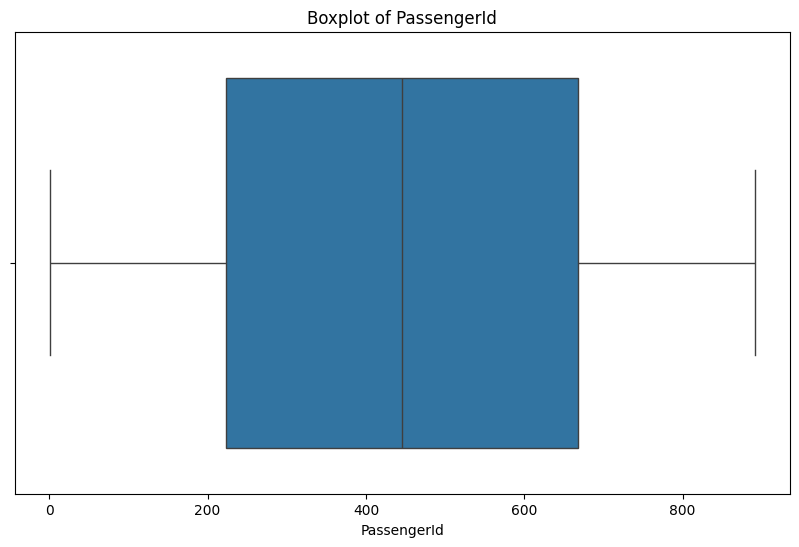

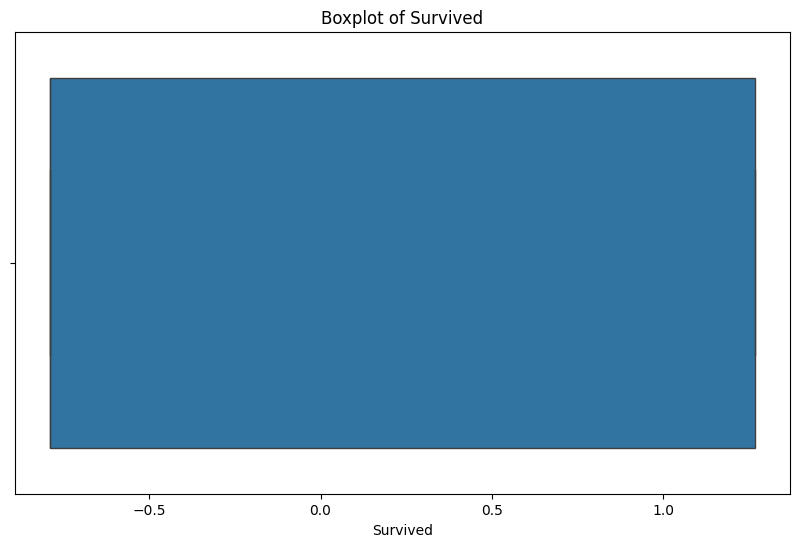

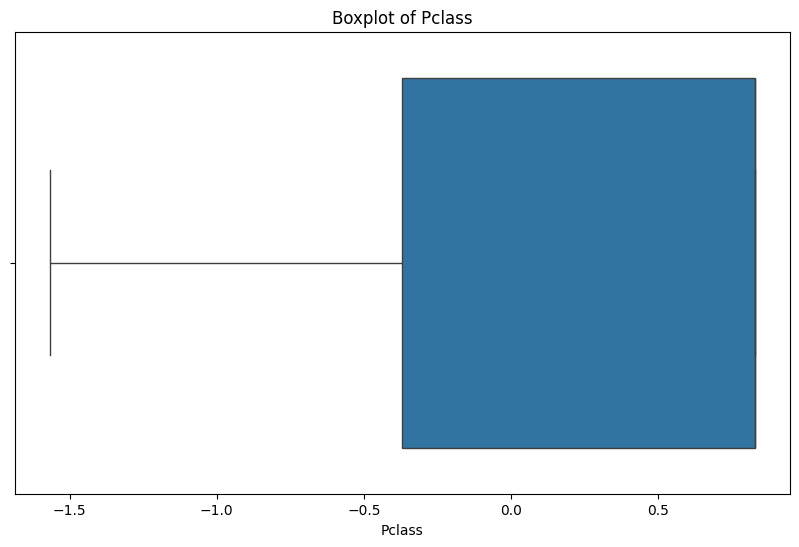

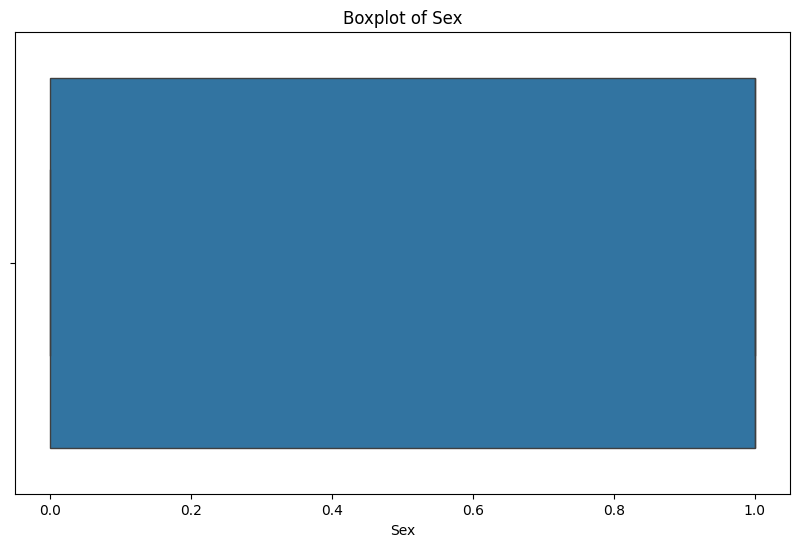

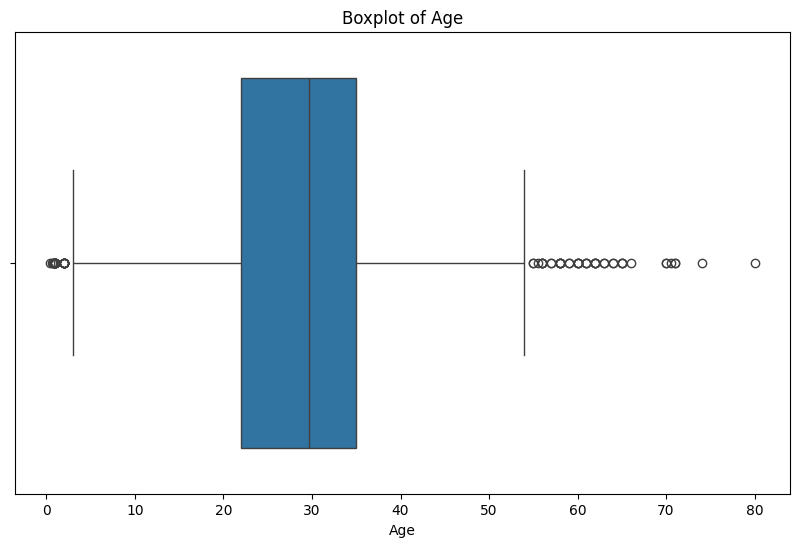

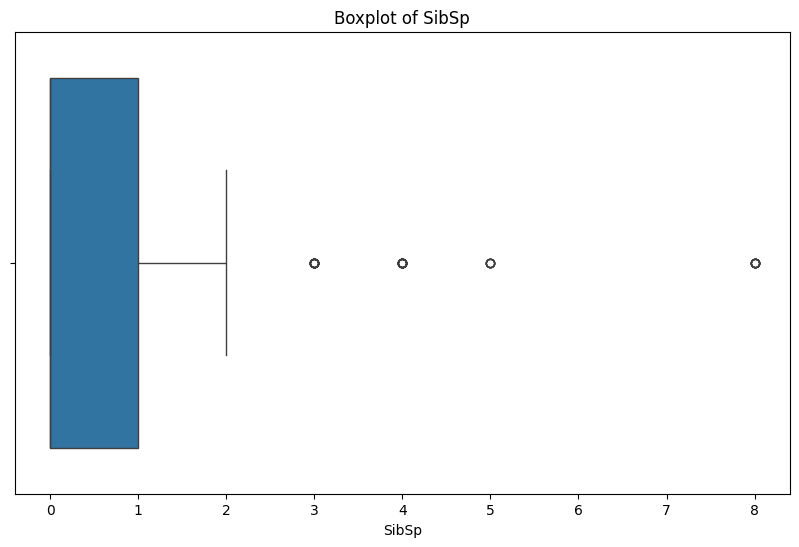

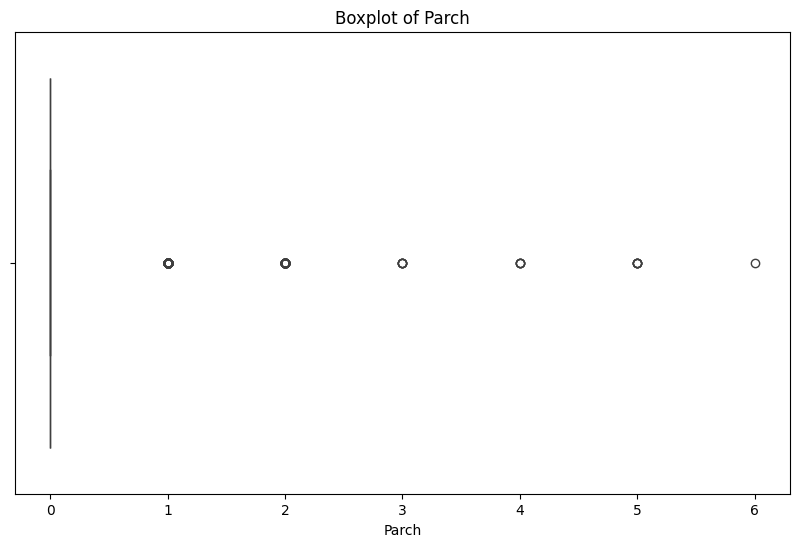

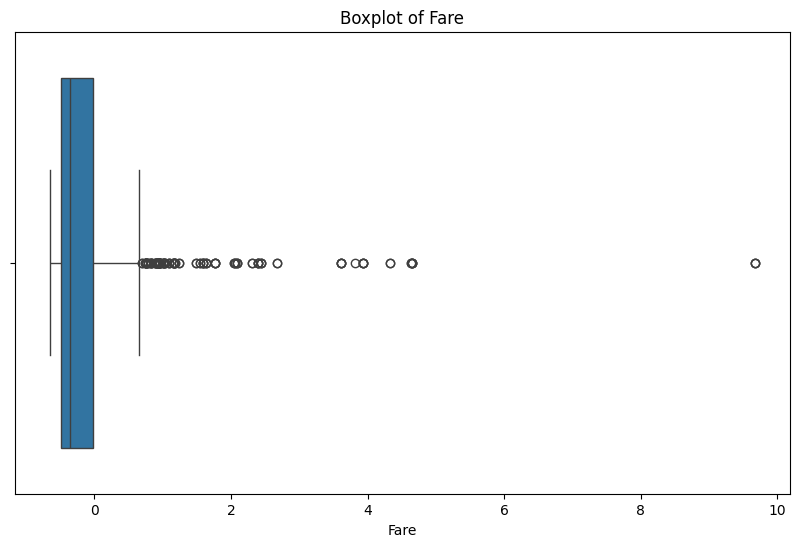

In [17]:
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [18]:
outliers = {}
for col in numerical_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
  outliers[col] = outlier_indices.tolist()

for col, indices in outliers.items():
  print(f"Outliers in '{col}' at indices: {indices}")

Outliers in 'PassengerId' at indices: []
Outliers in 'Survived' at indices: []
Outliers in 'Pclass' at indices: []
Outliers in 'Sex' at indices: []
Outliers in 'Age' at indices: [7, 11, 15, 16, 33, 54, 78, 94, 96, 116, 119, 152, 164, 170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305, 326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492, 493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659, 672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851, 879]
Outliers in 'SibSp' at indices: [7, 16, 24, 27, 50, 59, 63, 68, 71, 85, 88, 119, 159, 164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787, 792, 813, 819, 824, 846, 850, 863]
Outliers in 'Parch' at indices: [7, 8, 10, 13, 16, 24, 25, 27, 43, 50, 54, 58, 59, 63, 65, 68, 71, 78, 86, 88, 93, 97, 98, 102, 118, 119, 124, 128, 136, 140, 145, 147, 148, 153, 155, 159, 160, 164, 165, 166, 167, 171, 172, 175, 176, 180, 182, 183, 18

In [19]:
all_outlier_indices = []
for indices in outliers.values():
  all_outlier_indices.extend(indices)

all_outlier_indices = list(set(all_outlier_indices))

df = df.drop(index=all_outlier_indices, axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,-0.789272,0.827377,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,-0.502445,29.699118,S
2,3,1.266990,0.827377,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,-0.488854,29.699118,S
3,4,1.266990,-1.566107,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,0.420730,C123,S
4,5,-0.789272,0.827377,"Allen, Mr. William Henry",1,35.000000,0,0,373450,-0.486337,29.699118,S
5,6,-0.789272,0.827377,"Moran, Mr. James",1,29.699118,0,0,330877,-0.478116,29.699118,Q


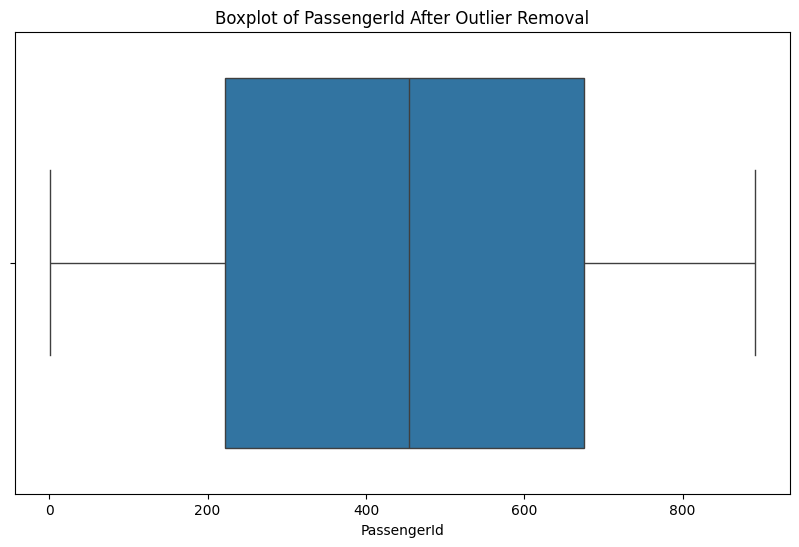

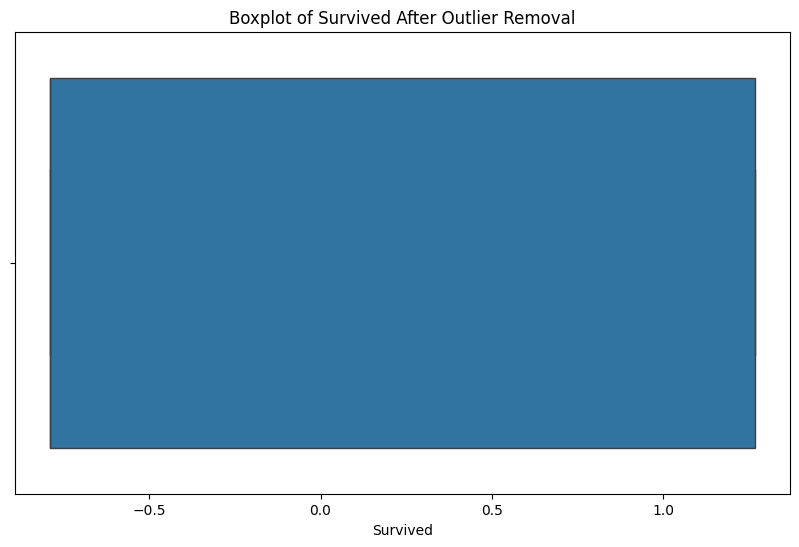

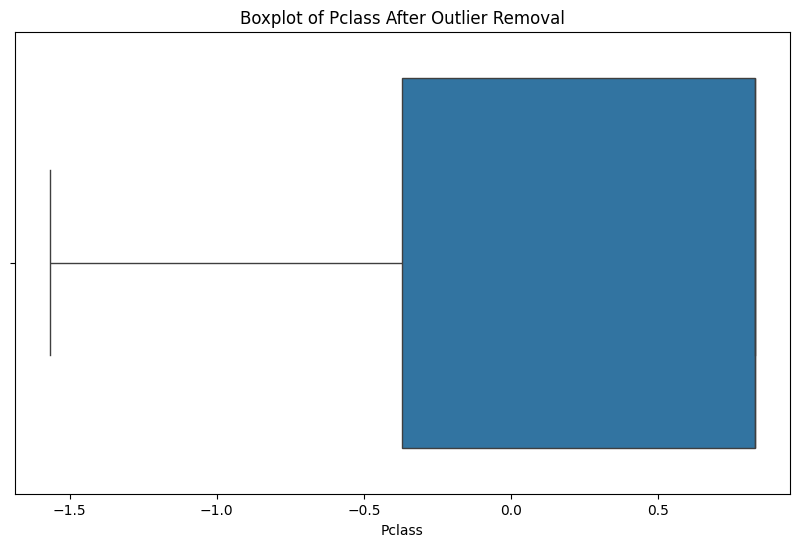

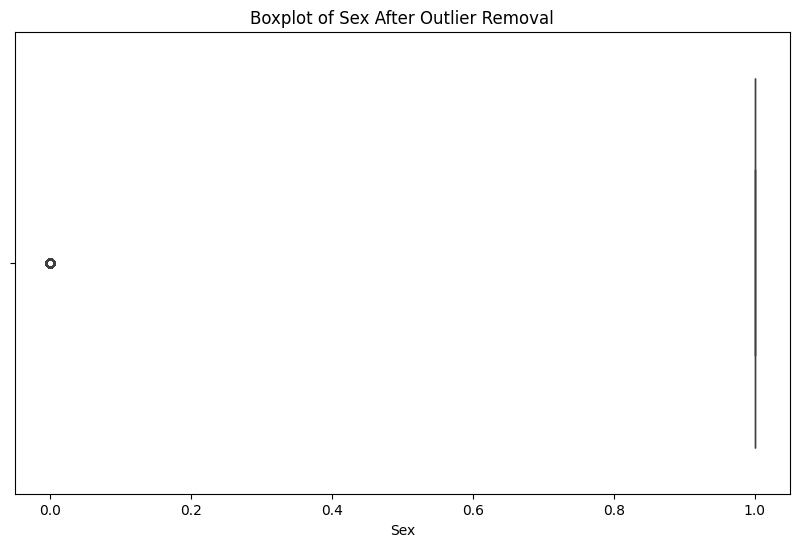

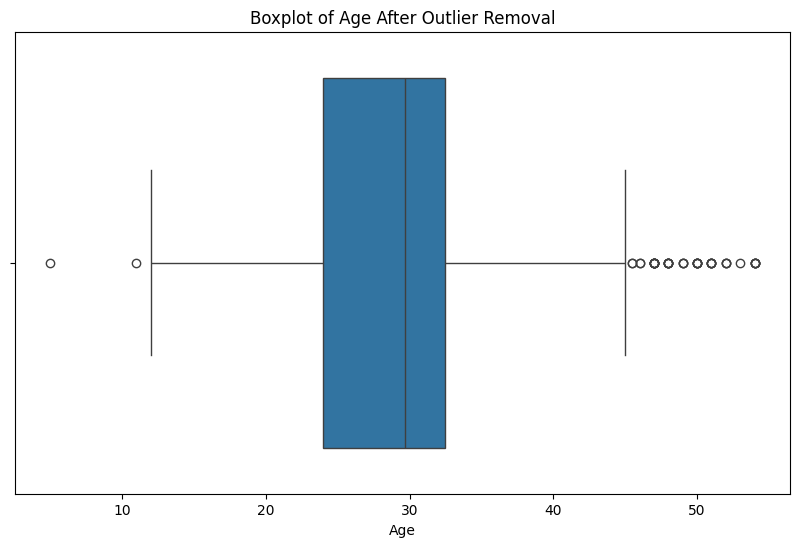

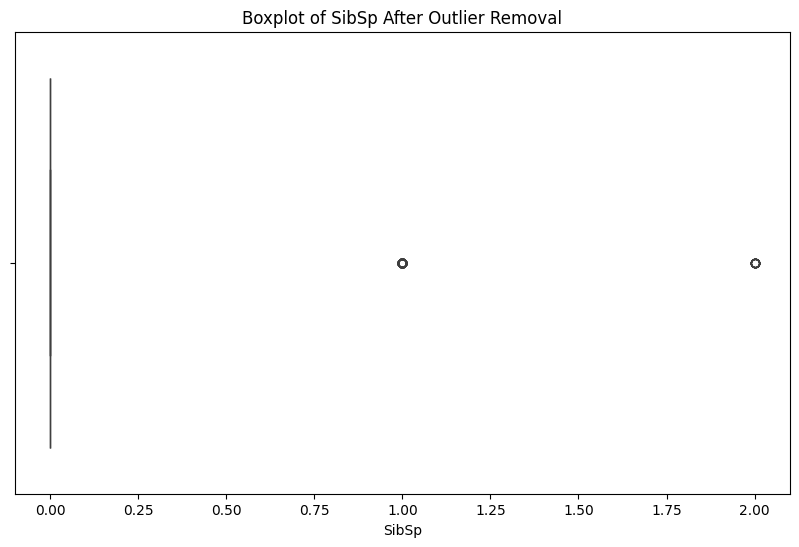

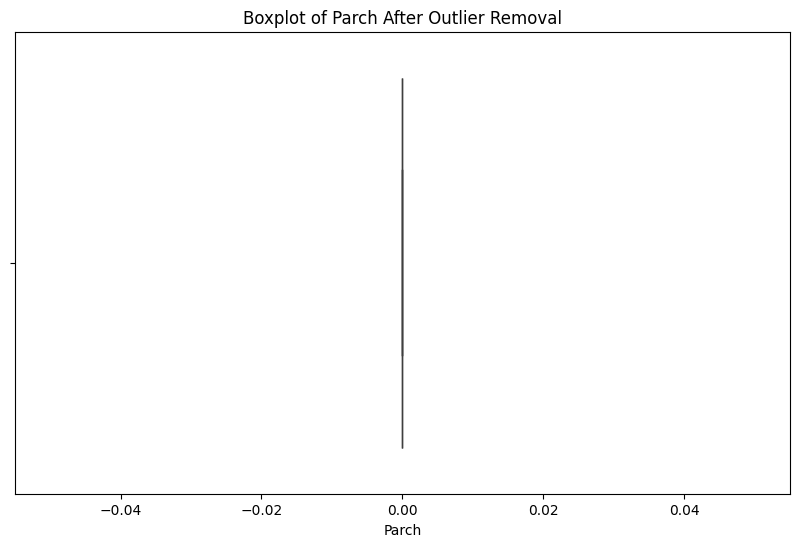

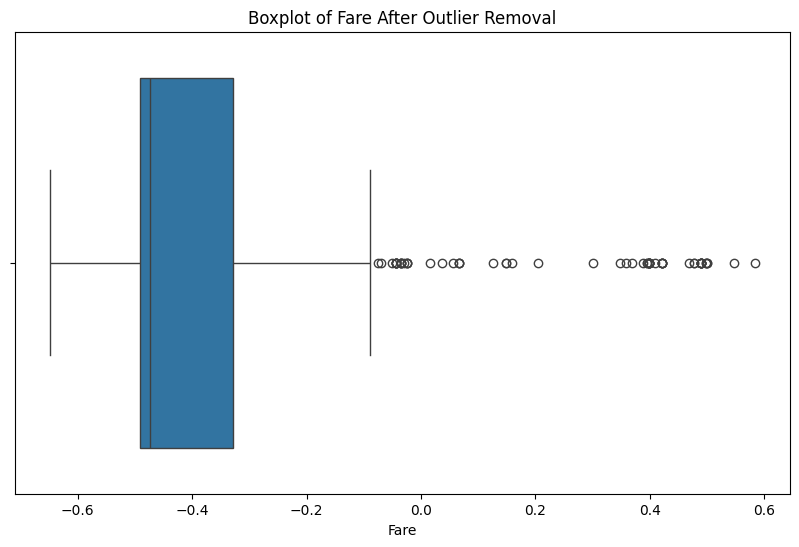

In [20]:
for col in numerical_cols:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col} After Outlier Removal')
  plt.show()

## Summary:

### Data Analysis Key Findings

*   Numerical columns in the DataFrame were identified as 'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', and 'Fare'.
*   Boxplots were generated for each numerical column to visualize outliers.
*   Outliers were identified using the IQR method in the 'Age', 'SibSp', 'Parch', and 'Fare' columns.
*   A total of 200 unique outlier indices were identified across the numerical columns.
*   Rows corresponding to the identified outlier indices were removed from the DataFrame.
*   Boxplots of the numerical columns after outlier removal were generated, showing the data distribution after the removal process.

### Insights or Next Steps

*   The outlier removal process significantly impacted the data distribution in columns like 'Age', 'SibSp', 'Parch', and 'Fare'. Further analysis could investigate the reasons for these outliers and their potential impact on downstream modeling.
*   While the IQR method is a common approach, exploring alternative outlier detection and handling techniques (e.g., Z-score, isolation forest, or capping) could be beneficial depending on the data characteristics and the goals of the analysis.


**1.What are the different types of missing data?**
Missing Completely At Random (MCAR): In Python, if data is MCAR, the missingness is not dependent on any variables, observed or unobserved. You might see this as NaN values scattered randomly throughout a column, with no pattern related to other data points.
Missing At Random (MAR): If data is MAR, the missingness is related to some observed variables but not the missing value itself. For example, in a survey, men might be less likely to answer a question about their weight than women. The missingness in the 'weight' column is related to the 'gender' column (which is observed), but not the actual weight value itself. In Python, you might observe that NaN values in one column correlate with specific values in another column.
Missing Not At Random (MNAR): If data is MNAR, the missingness is related to the unobserved value itself. For example, people with very high incomes might be less likely to report their income on a survey. The missingness in the 'income' column is related to the actual income value (which is unobserved because it's missing). In Python, detecting MNAR is the most challenging and often requires domain knowledge to understand why the data might be missing.
**2.How do you handle categorical variables? **
Categorical variables need to be converted into a numerical format for most machine learning algorithms. Common techniques include:
Label Encoding: Assigning a unique integer to each category. This is suitable for ordinal variables (where there's a natural order).
One-Hot Encoding: Creating new binary columns for each category. This is suitable for nominal variables (where there's no inherent order).
Target Encoding: Encoding categories based on the target variable's mean or distribution.

**3.What is the difference between normalization and standardization?**
Normalization (Min-Max Scaling): Scales features to a specific range, usually between 0 and 1. It's useful when features have different scales and you want to preserve the relationships between values.
Standardization (Z-score normalization): Scales features to have a mean of 0 and a standard deviation of 1. It's useful when features have different scales and distributions, and it's less affected by outliers than normalization.
**4.How do you detect outliers?**
Several methods can be used to detect outliers, including:
Visual methods: Box plots, scatter plots, histograms.
Statistical methods: Z-score, IQR (Interquartile Range) method.
Machine learning methods: Isolation Forests, DBSCAN, clustering.
**5.Why is preprocessing important in ML?**
Preprocessing is crucial because real-world data is often messy, containing missing values, outliers, noise, and inconsistencies. Preprocessing helps to:
Improve the quality of the data.
Make the data suitable for machine learning algorithms.
Improve the performance and accuracy of the model.
Reduce training time.
Prevent models from being biased by skewed data.
**6.What is one-hot encoding vs label encoding?**
Label Encoding: Assigns a unique integer to each category. It can introduce an artificial sense of order if the categories are not ordinal, which can mislead some algorithms.
One-Hot Encoding: Creates a new binary column for each unique category. A 1 in a column indicates the presence of that category, and 0 indicates its absence. This avoids introducing artificial order and is generally preferred for nominal variables.
**7.How do you handle data imbalance?**
Data imbalance occurs when the number of instances in different classes is significantly different. Techniques to handle it include:
Resampling:
Oversampling: Duplicating instances of the minority class (e.g., SMOTE).
Undersampling: Removing instances of the majority class.
Using different evaluation metrics: Precision, recall, F1-score, AUC-ROC are more informative than accuracy in imbalanced datasets.
Using algorithms that handle imbalance: Some algorithms like tree-based models are less sensitive to imbalance.
Generating synthetic data: Creating new data points for the minority class.

**8.Can preprocessing affect model accuracy?**
Yes, absolutely! Preprocessing has a significant impact on model accuracy. Proper preprocessing can lead to a more accurate and robust model, while poor preprocessing can result in a poorly performing model. For example, handling missing values incorrectly can introduce bias, and not scaling features can cause algorithms sensitive to scale (like SVM or k-NN) to perform poorly.